<a href="https://colab.research.google.com/github/AliAramideh/Predicting_Heating_Load-of_a_Building/blob/main/Predicting_Heating_Load_of_a_Building_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

---

In The Name Of God
<center>

# Author: **Ali Aramideh**

## Imprt needed packages

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import combinations, chain
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Load the dataset

In [76]:
url = 'https://github.com/AliAramideh/Predicting_Heating_Load-of_a_Building/raw/main/HeatingLoadOfBulding.csv'
dataset = pd.read_csv(url)

# Rename columns of dataset to the best name that we know
dataset = dataset.rename(columns={'X1' : 'RelativeCompactness',
                                  'X2' : 'SurfaceArea',
                                  'X3': 'WallArea',
                                  'X4' : 'RoofArea',
                                  'X5' : 'OverallHeight',
                                  'X6' : 'Orientation',
                                  'X7' : 'GlazingArea',
                                  'X8' : 'GlazingAreaDistribution',
                                  'Y1' : 'HeatingLoad',
                                  'Y2' : 'CoolingLoad'})
dataset

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


## Define the Dataset

we have prepared a dataset in the `q1.csv` file. This dataset is used to estimate the **heating load** and **cooling load** of a building based on its parameters. The parameters in this dataset are explained below:

- $X_1$: Relative Compactness
- $X_2$: Surface Area
- $X_3$: Wall Area
- $X_4$: Roof Area
- $X_5$: Overall Height
- $X_6$: Orientation
- $X_7$: Glazing Area
- $X_8$: Glazing Area Distribution
- $Y_1$: Heating Load
- $Y_2$: Cooling Load


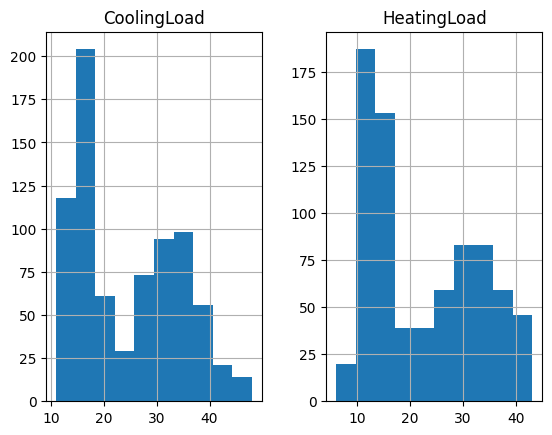

In [77]:
dataset[['CoolingLoad', 'HeatingLoad']].hist()
plt.show()

<Axes: xlabel='SurfaceArea', ylabel='CoolingLoad'>

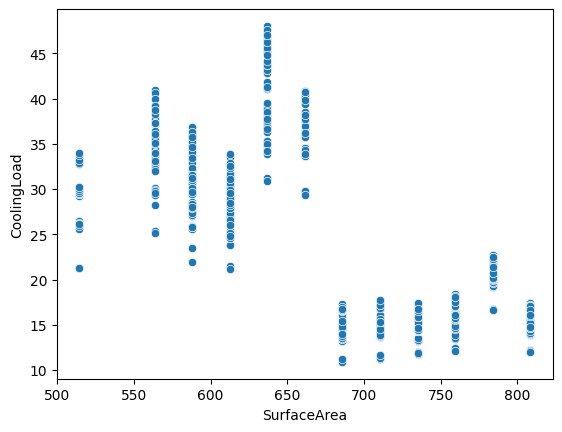

In [78]:
sns.scatterplot(data=dataset, x='SurfaceArea', y='CoolingLoad')

In [79]:
dependent_vars = ['CoolingLoad', 'HeatingLoad']
X = dataset.drop(columns=dependent_vars)
Y = dataset[dependent_vars]
print(X.shape)
print(Y.shape)

(768, 8)
(768, 2)


### Split data to train and test set

In [80]:
# from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=4)
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(614, 8)
(614, 2)
(154, 8)
(154, 2)


## Modeling

In [81]:
# from sklearn.linear_model import LinearRegression

model_lin_reg = LinearRegression()
model_lin_reg.fit(train_X, train_Y)

LinearRegression()

## Predicting

In [82]:
pred_Y = model_lin_reg.predict(test_X)

## Evaluation

In [83]:
# from sklearn.metrics import r2_score

r2_score_all_features = r2_score(test_Y, pred_Y)
print(r2_score_all_features)

0.9058515462759926


## Feature selection

In [84]:
dataset.corr()

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
RelativeCompactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
SurfaceArea,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
WallArea,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
RoofArea,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
OverallHeight,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
GlazingArea,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
GlazingAreaDistribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
HeatingLoad,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
CoolingLoad,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


According to above cell probabily we can drop `Orientation`, `GlazingArea`, `GlazingAreaDistribution`, `WallArea`

`itertools.combinations` generates all possible combinations of a given length from a sequence.

`itertools.chain` is a function provided by the itertools module in Python's standard library. It's used to combine multiple iterable objects (like lists, tuples, or other sequences) into a single iterable. This allows you to iterate over all the elements of the combined iterables as if they were a single continuous sequence.

In [85]:
# from itertools import combinations, chain

feature_list = ['Orientation', 'GlazingArea', 'GlazingAreaDistribution', 'WallArea']
best_features_to_remove = []
best_r2_score = r2_score_all_features

# Generate all possible combinations
all_combinations = chain(*map(lambda x: combinations(feature_list, x), range(0, len(feature_list)+1)))

# Iterate through combinations
for feature_subset in all_combinations:
  if len(feature_subset) == 0:
    continue
  # print(list(feature_subset))
  # Modeling
  X_subset = X.drop(columns=list(feature_subset))
  # Split train test sets
  train_X_subset, test_X_subset, train_Y_subset, test_Y_subset = train_test_split(
      X_subset, Y, test_size=0.2, random_state=4
  )
  model = LinearRegression()
  model.fit(train_X_subset, train_Y_subset)

  # Predicting
  pred_Y_subset = model.predict(test_X_subset)

  # Evaluation
  r2_score_subset = r2_score(test_Y_subset, pred_Y_subset)
  # print(r2_score_subset) --> If you want observe all r2 scores

  # The best
  if r2_score_subset > best_r2_score:
    best_r2_score = r2_score_subset
    best_features_to_remove = list(feature_subset)

print('The best features to remove:', best_features_to_remove)
print('The best r2_score:', best_r2_score)

The best features to remove: ['GlazingAreaDistribution']
The best r2_score: 0.9102307383713044


As you see if we remove `GlazingAreaDistribution` feature, our model will be better. Therefore:

In [86]:
X = X.drop(columns=best_features_to_remove)

# Split train test sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=4)

# Modeling
model_lin_reg = LinearRegression()
model_lin_reg.fit(train_X, train_Y)

# Predicting
pred_Y = model_lin_reg.predict(test_X)

# Evaluation
print(r2_score(test_Y, pred_Y))

0.9102307383713044
